In [1]:
import pandas as pd
from piper import piper
from piper.defaults import *
from piper.verbs import *

piper version 0.0.7, last run: Friday, 26 February 2021 14:55:27


In [2]:
csv = 'inputs/2018 Bestsellers.csv'

renamed_cols = {
    'ï»¿title': 'title',
    'previous_rank': 'prev_rank',
    'weeks_on_list': 'weeks_listed'
}

In [3]:
%%piper

df <- pd.read_csv(csv, parse_dates=['Week'])
>> rename(columns=renamed_cols)
>> clean_columns()
>> head()

1300 rows, 9 columns


In [4]:
count(df, 'author')

,author,n
0,R.J. Palacio,2
1,Kelly Barnhill,1
2,Madeleine L'Engle,1


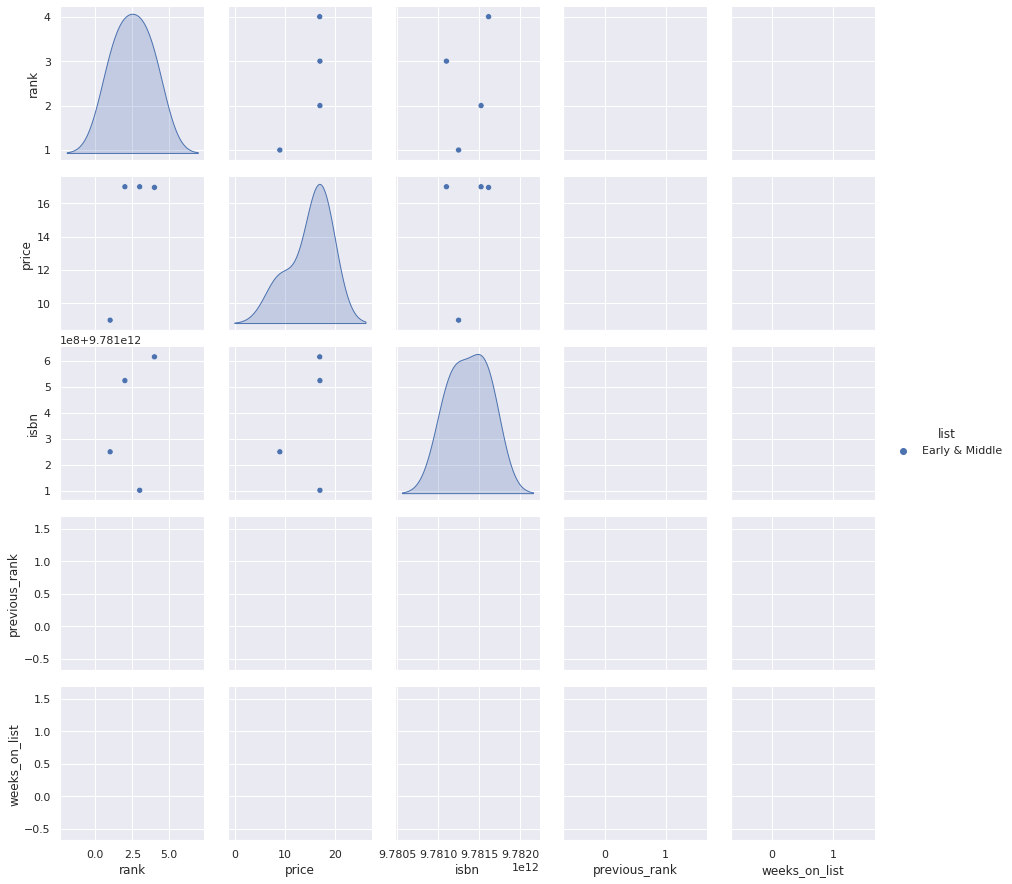

In [5]:
sns.pairplot(df, hue='list');

In [6]:
counts(df, 
       ['author', 'title', 'list'], 
       percent=True, 
       threshold=80)

n     %
author            title                       list                   
Kelly Barnhill    The Girl Who Drank the Moon Early & Middle  1  25.0
Madeleine L'Engle A Wrinkle in Time           Early & Middle  1  25.0
R.J. Palacio      Auggie & Me                 Early & Middle  1  25.0
                  Wonder                      Early & Middle  1  25.0

In [7]:
count(df, 'week')

,week,n
0,2018-02-14,4


In [8]:
df_counts = counts(df, ['list', 'price'], sort_values=None, reset_index=True)
display(head(df_counts))

3 rows, 3 columns


,list,price,n
0,Early & Middle,8.99,1
1,Early & Middle,16.95,1
2,Early & Middle,16.99,2


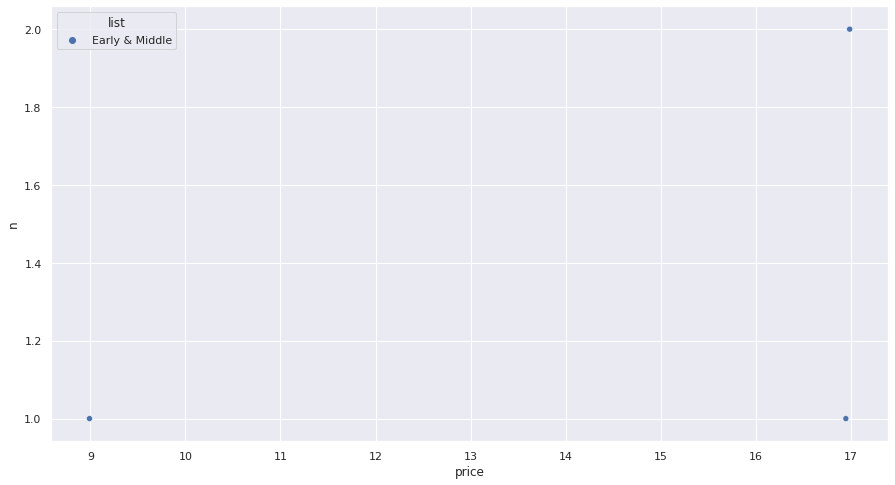

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df_counts, y='n', x='price', hue='list');

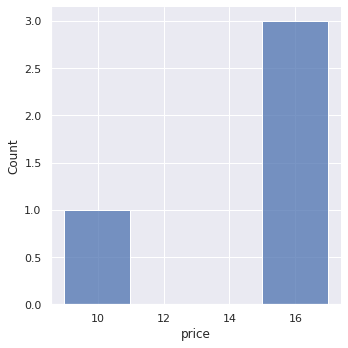

In [10]:
sns.displot(df['price']);